In [1]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
IMAGES_DIR = "../data/images"
DIRS = ["train", "test", "val"]

In [19]:
# Gamma correction on an image

def adjust_gamma(image, gamma=1.0):
    """
    Apply gamma correction to an image.

    Parameters:
        image: numpy array, input image of shape (W, H, 3).
        gamma: float, gamma value. Default is 1.0.

    Returns:
        numpy array, gamma corrected image.
    """
    image = image.astype(np.float32) / 255.0
    gamma_corrected = np.power(image, gamma)
    gamma_corrected = np.clip(gamma_corrected, 0, 1)
    gamma_corrected = (gamma_corrected * 255).astype(np.uint8)
    return gamma_corrected

def brightness_increase(image, value):
    """
    Increase brightness of an image.

    Parameters:
        image: numpy array, input image of shape (W, H, 3).

    Returns:
        numpy array, image with increased brightness.
    """
    hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    h, s, v = cv.split(hsv)
    v = cv.add(v, value)
    v = np.clip(v, 0, 255)
    hsv = cv.merge((h, s, v))
    return cv.cvtColor(hsv, cv.COLOR_HSV2BGR)

def sharpen_image(image, mode=0):
    
    if(mode == 0):
        kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    elif(mode == 1):
        kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    else:
        kernel = np.array([[1, 1, 1], [1, -7, 1], [1, 1, 1]])
        
    sharpened = cv.filter2D(image, -1, kernel)
    return sharpened

In [9]:
def plot_images(title, imgs):
    subplots = len(imgs)
    plt.figure(figsize=(15, 5))
    plt.title(title)
    plt.axis("off")
    
    for i, img in enumerate(imgs):
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        plt.subplot(1, subplots, i + 1)
        plt.imshow(img)
        plt.axis("off")
    plt.show()

In [ ]:
if False:
    GAMMA = 0.4

    OUTPUT_DIR = "../data_3/images"
    for d in DIRS:
        os.makedirs(os.path.join(OUTPUT_DIR, d), exist_ok=True)
        
    for d in DIRS:
        FOLDER = os.path.join(IMAGES_DIR, d)
        
        imgs = os.listdir(FOLDER)
        
        for img in imgs:
            if(os.path.exists(os.path.join(OUTPUT_DIR, d, img))):
                print(f"Image: {img} already done")
                continue
            
            image = cv.imread(os.path.join(FOLDER, img), cv.IMREAD_COLOR)
            
            gamma_corrected = adjust_gamma(image, GAMMA)
            
            cv.imwrite(os.path.join(OUTPUT_DIR, d, img), gamma_corrected)
            
            print(f"Image: {img} done")        

In [22]:
train_imgs = os.listdir(os.path.join(IMAGES_DIR, "train"))

image = cv.imread(os.path.join(IMAGES_DIR, "train", train_imgs[3]), cv.IMREAD_COLOR)

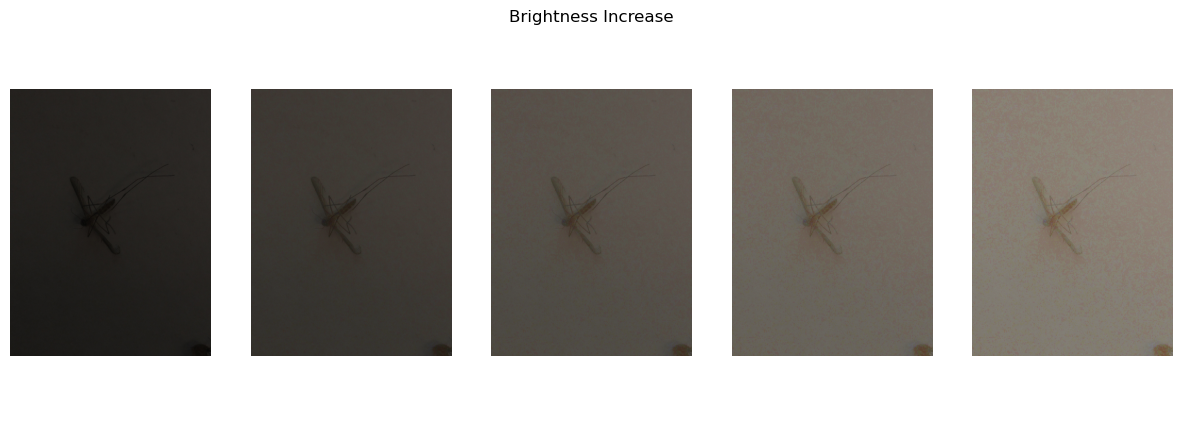

In [15]:
VALUES = [25, 50, 75, 100]

images = []
images.append(image)

for value in VALUES:
    new_image = brightness_increase(image, value)
    images.append(new_image)
    
plot_images("Brightness Increase", images)

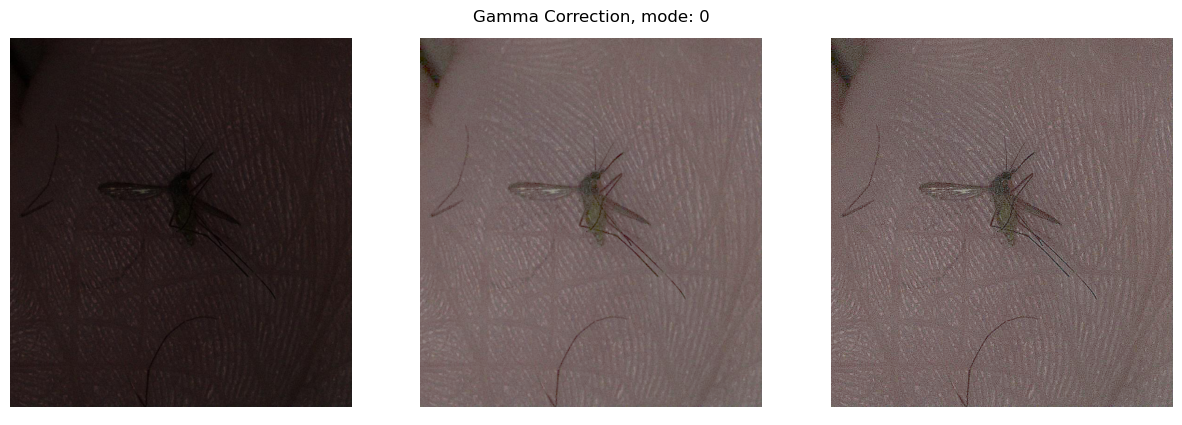

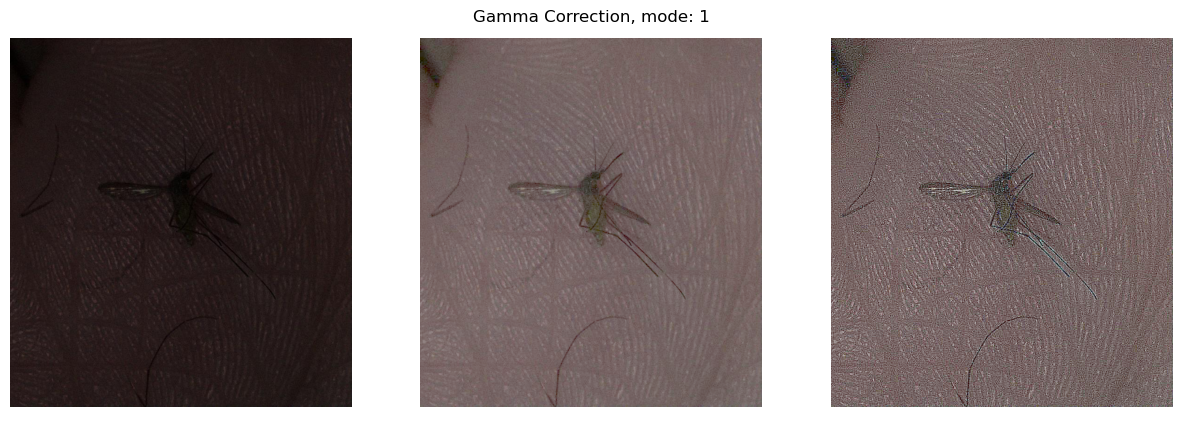

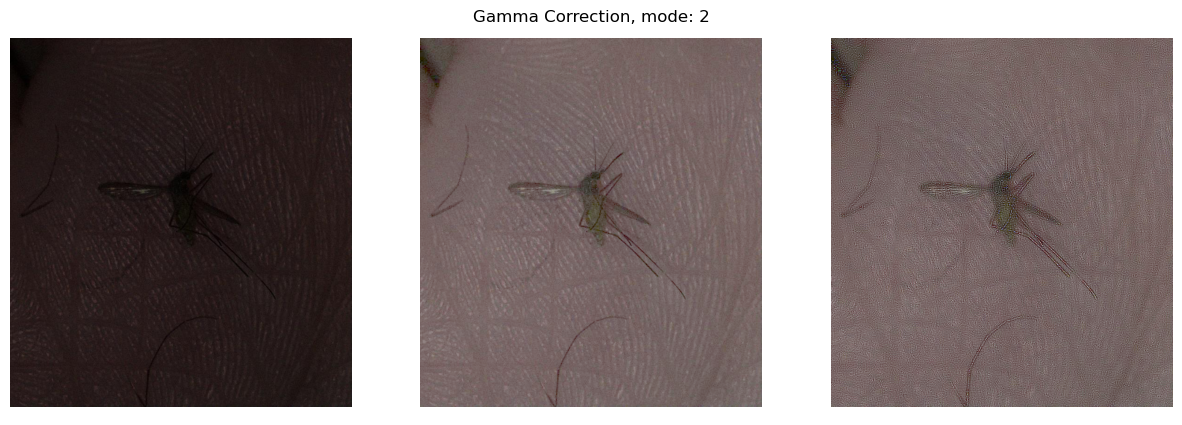

In [23]:
GAMMA = 0.4
MODES = [0, 1, 2]


for mode in MODES:
    images = []
    images.append(image)
    gamma_corrected = adjust_gamma(image, GAMMA)
    images.append(gamma_corrected)
    new_image = sharpen_image(gamma_corrected, mode)
    images.append(new_image)
    plot_images(f"Gamma Correction, mode: {mode}", images)
    